导入模块
数据处理

In [1]:
import pandas as pd
import numpy as np

In [2]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [3]:
from ipywidgets import DOMWidget, Layout, widget_serialization

1.1可视化

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid',font_scale=1.3)
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

1.2特征工程

In [5]:
import sklearn
from sklearn import preprocessing                            #数据预处理模块
from sklearn.preprocessing import LabelEncoder               #编码转换
from sklearn.preprocessing import StandardScaler             #归一化
from sklearn.model_selection import StratifiedShuffleSplit   #分层抽样
from sklearn.model_selection import train_test_split         #数据分区
from sklearn.decomposition import PCA                        #主成分分析 （降维）

1.4分类算法

In [6]:
from sklearn.ensemble import RandomForestClassifier     #随机森林
from sklearn.svm import SVC,LinearSVC                   #支持向量机
from sklearn.linear_model import LogisticRegression     #逻辑回归
from sklearn.neighbors import KNeighborsClassifier      #KNN算法
from sklearn.cluster import KMeans                     #K-Means 聚类算法
from sklearn.naive_bayes import GaussianNB              #朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier         #决策树

1.5分类算法–集成学习

In [1]:
# import xgboost as xgb
# from xgboost import XGBClassifier                      
# from catboost import CatBoostClassifier                
# from sklearn.ensemble import AdaBoostClassifier        
# from sklearn.ensemble import GradientBoostingClassifier 

1.6、模型评估

In [8]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score  #分类报告
from sklearn.metrics import confusion_matrix           #混淆矩阵
from sklearn.metrics import silhouette_score           #轮廓系数（评价k-mean聚类效果）
from sklearn.model_selection import GridSearchCV       #交叉验证
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingClassifier          #投票

In [9]:
import warnings
warnings.filterwarnings('ignore')

6.2、读取数据

In [10]:
df= pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

6.3、数据清洗
6.3.1、缺失值处理

In [11]:
#查看缺失值
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

6.3.2、重复值处理

In [12]:
#查看重复值
df.duplicated().sum()

0

6.3.3、数值类型转换

In [13]:
#查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
#总费用 TotalCharges  该列的数据类型应是float64，不是object
# df['TotalCharges'].astype('float64')
# 此处用“astype”转化数据类型报错 “could not convert string to float”
#改用强制转化 convert_numeric=True   
# 将这些空的数据设置成0
df.TotalCharges[df['TotalCharges'].map(str.strip)=='']=0
df['TotalCharges']=df['TotalCharges'].astype(float)

<AxesSubplot:title={'center':'Retained Customers'}, xlabel='TotalCharges', ylabel='Density'>

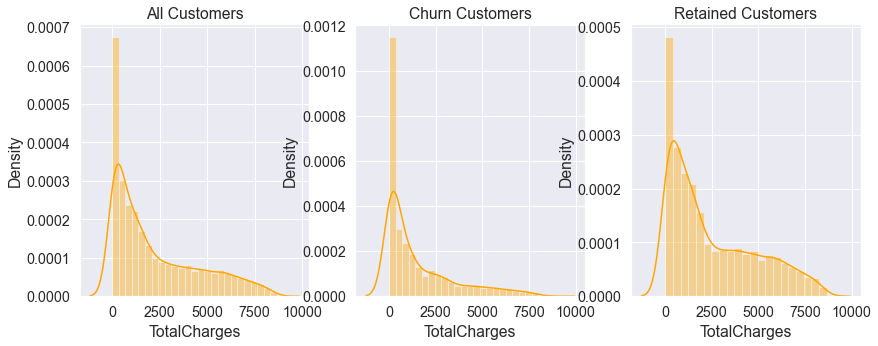

In [15]:
#分别作直方图：全部客户类型、流失客户类型、留存客户类型
# 设置全局字体和背景板颜色
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.title('All Customers')
sns.distplot(df['TotalCharges'].dropna(), color='orange')

plt.subplot(1,3,2)
plt.title('Churn Customers')
sns.distplot(df[df['Churn']=='Yes']['TotalCharges'].dropna(), color='orange')

plt.subplot(1,3,3)
plt.title('Retained Customers')
sns.distplot(df[df['Churn']=='No']['TotalCharges'].dropna(), color='orange')

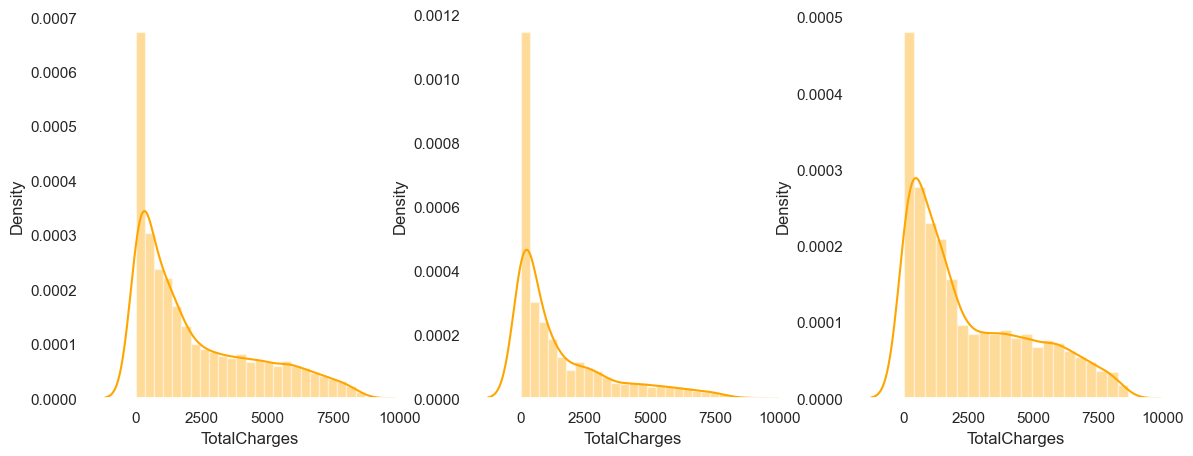

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置全局字体和背景板颜色
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})


plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
#plt.title('All Customers')
sns.distplot(df['TotalCharges'].dropna(), color='orange')

plt.subplot(1, 3, 2)
#plt.title('Churn Customers')
sns.distplot(df[df['Churn'] == 'Yes']['TotalCharges'].dropna(), color='orange')

plt.subplot(1, 3, 3)
#plt.title('Retained Customers')
sns.distplot(df[df['Churn'] == 'No']['TotalCharges'].dropna(), color='orange')
sns.despine()
plt.show()


6.4、查看样本分布
研究对象’Churn’列重新编码“Yes”=1，“No“=0
重新编码有两种方法：
方法一：replace

In [17]:
#从三个直方图看，该列数据是偏态分布，故选择“中位数”填充
df.fillna({'TotalCharges':df['TotalCharges'].median()},inplace=True)
#再次确认是否还有空值
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

方法二：map函数

In [18]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [19]:
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [20]:
df['Churn']=df['Churn'].astype(object)

In [21]:
df.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: object

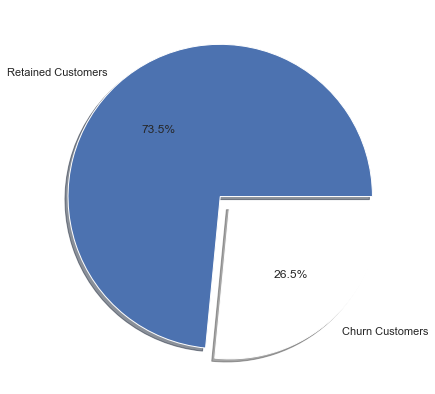

In [22]:
#绘制饼图,查看流失客户占比
churn_value=df["Churn"].value_counts()
labels=df["Churn"].value_counts().index

plt.figure(figsize=(7,7))
plt.pie(churn_value,labels=['Retained Customers', 'Churn Customers'],colors=["b","w"], explode=[0, 0.09] ,autopct='%1.1f%%', shadow=True)
# plt.title("流失客户占比高达26.5%")
plt.show()  

In [23]:
# x --------每一块饼图的比例组成的序列。可以是一个列表。如果其中元素的值加起来大于一，则会通过
# 归一化处理后的结果。

# explode -------- 指每一块饼距离圆心的距离。默认为0。如果大于0，则饼即会分裂出来，即“分裂饼形图”效果。

# labels -------- 标签，即每一块饼图外侧显示的说明文字

# autopct -------- 设置饼图百分比的格式。即字符串的格式，可以使用格式化字符串表达式或者format()函数的表达式。 不设定这个参数则不会显示百分比的字符串。

# pctdistance --------指百分比的位置刻度，默认为0.6。

# shadow --------布尔类型，饼图是否带阴影（立体感）。默认False不带。

# labeldistance --------标记的绘制的位置，占半径长度的比例。默认为1.1，如果大于1则显示在饼的内侧。

# startangle --------起始绘制角度，默认从x轴正方向逆时针画起。例如，设置为90则从y轴正方向画起。

# radius -------- 饼图的半径，默认为1。

# counterclock -------- 指针方向。布尔类型。默认为True，表示逆时针。如果为False则表示顺时针。

# wedgeprops -------- wedge对象的属性（wedge翻译过来即三角木，楔子，即表示饼图中的每一块儿），可选参数，字典类型，默认为None。这个字典将会传递给wedge对象。如wedgeprops={‘linewidth’:2}表示wedge的线条宽度为2。

7、特征选择

In [24]:
# feature=df.iloc[:,1:20]

7.1、整数编码
查看变量间的两两相关性

In [25]:
# #重新编码
# corr_df = feature.apply(lambda x: pd.factorize(x)[0])
# corr_df.head()
# #相关性矩阵
# corr=corr_df.corr()
# corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,0.001808,0.010517,-0.000013,-0.006488,-0.009451,-0.000863,-0.003429,0.012230,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.008072,-0.012302
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.010834,0.008576,0.113791,-0.032310,-0.210897,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.049649,0.023880
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.101985,-0.017706,-0.117307,-0.000891,-0.081850,0.090753,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.036054,-0.042628
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.048514,-0.001762,-0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.029390,0.006300
tenure,-0.000013,0.010834,-0.101985,0.048514,1.000000,-0.018799,0.063510,-0.012008,0.017083,-0.064613,0.037174,0.033108,0.027090,0.031491,0.122446,-0.011129,0.075379,0.041647,0.108142
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,-0.018799,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,-0.141829,-0.029806
MultipleLines,-0.009451,0.113791,-0.117307,-0.019657,0.063510,0.675070,1.000000,0.186826,-0.066844,-0.130619,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.024338,0.015373
InternetService,-0.000863,-0.032310,-0.000891,0.044590,-0.012008,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.289963,-0.038247
OnlineSecurity,-0.003429,-0.210897,-0.081850,0.190523,0.017083,0.125353,-0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.220566,-0.026788
OnlineBackup,0.012230,-0.144828,0.090753,0.062775,-0.064613,0.129770,-0.130619,0.650962,0.621739,1.000000,0.601503,0.617003,0.604117,0.606863,0.035407,0.260715,0.003183,-0.284344,-0.054537


相关性矩阵可视化

In [2]:
# #绘制热力图观察变量之间的相关性强弱
# plt.rcParams['font.family'] = 'Times New Roman'
# plt.figure(figsize=(25,18))
# ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
#                  linewidths=3, cmap="RdYlGn",annot=True)
# plt.title()

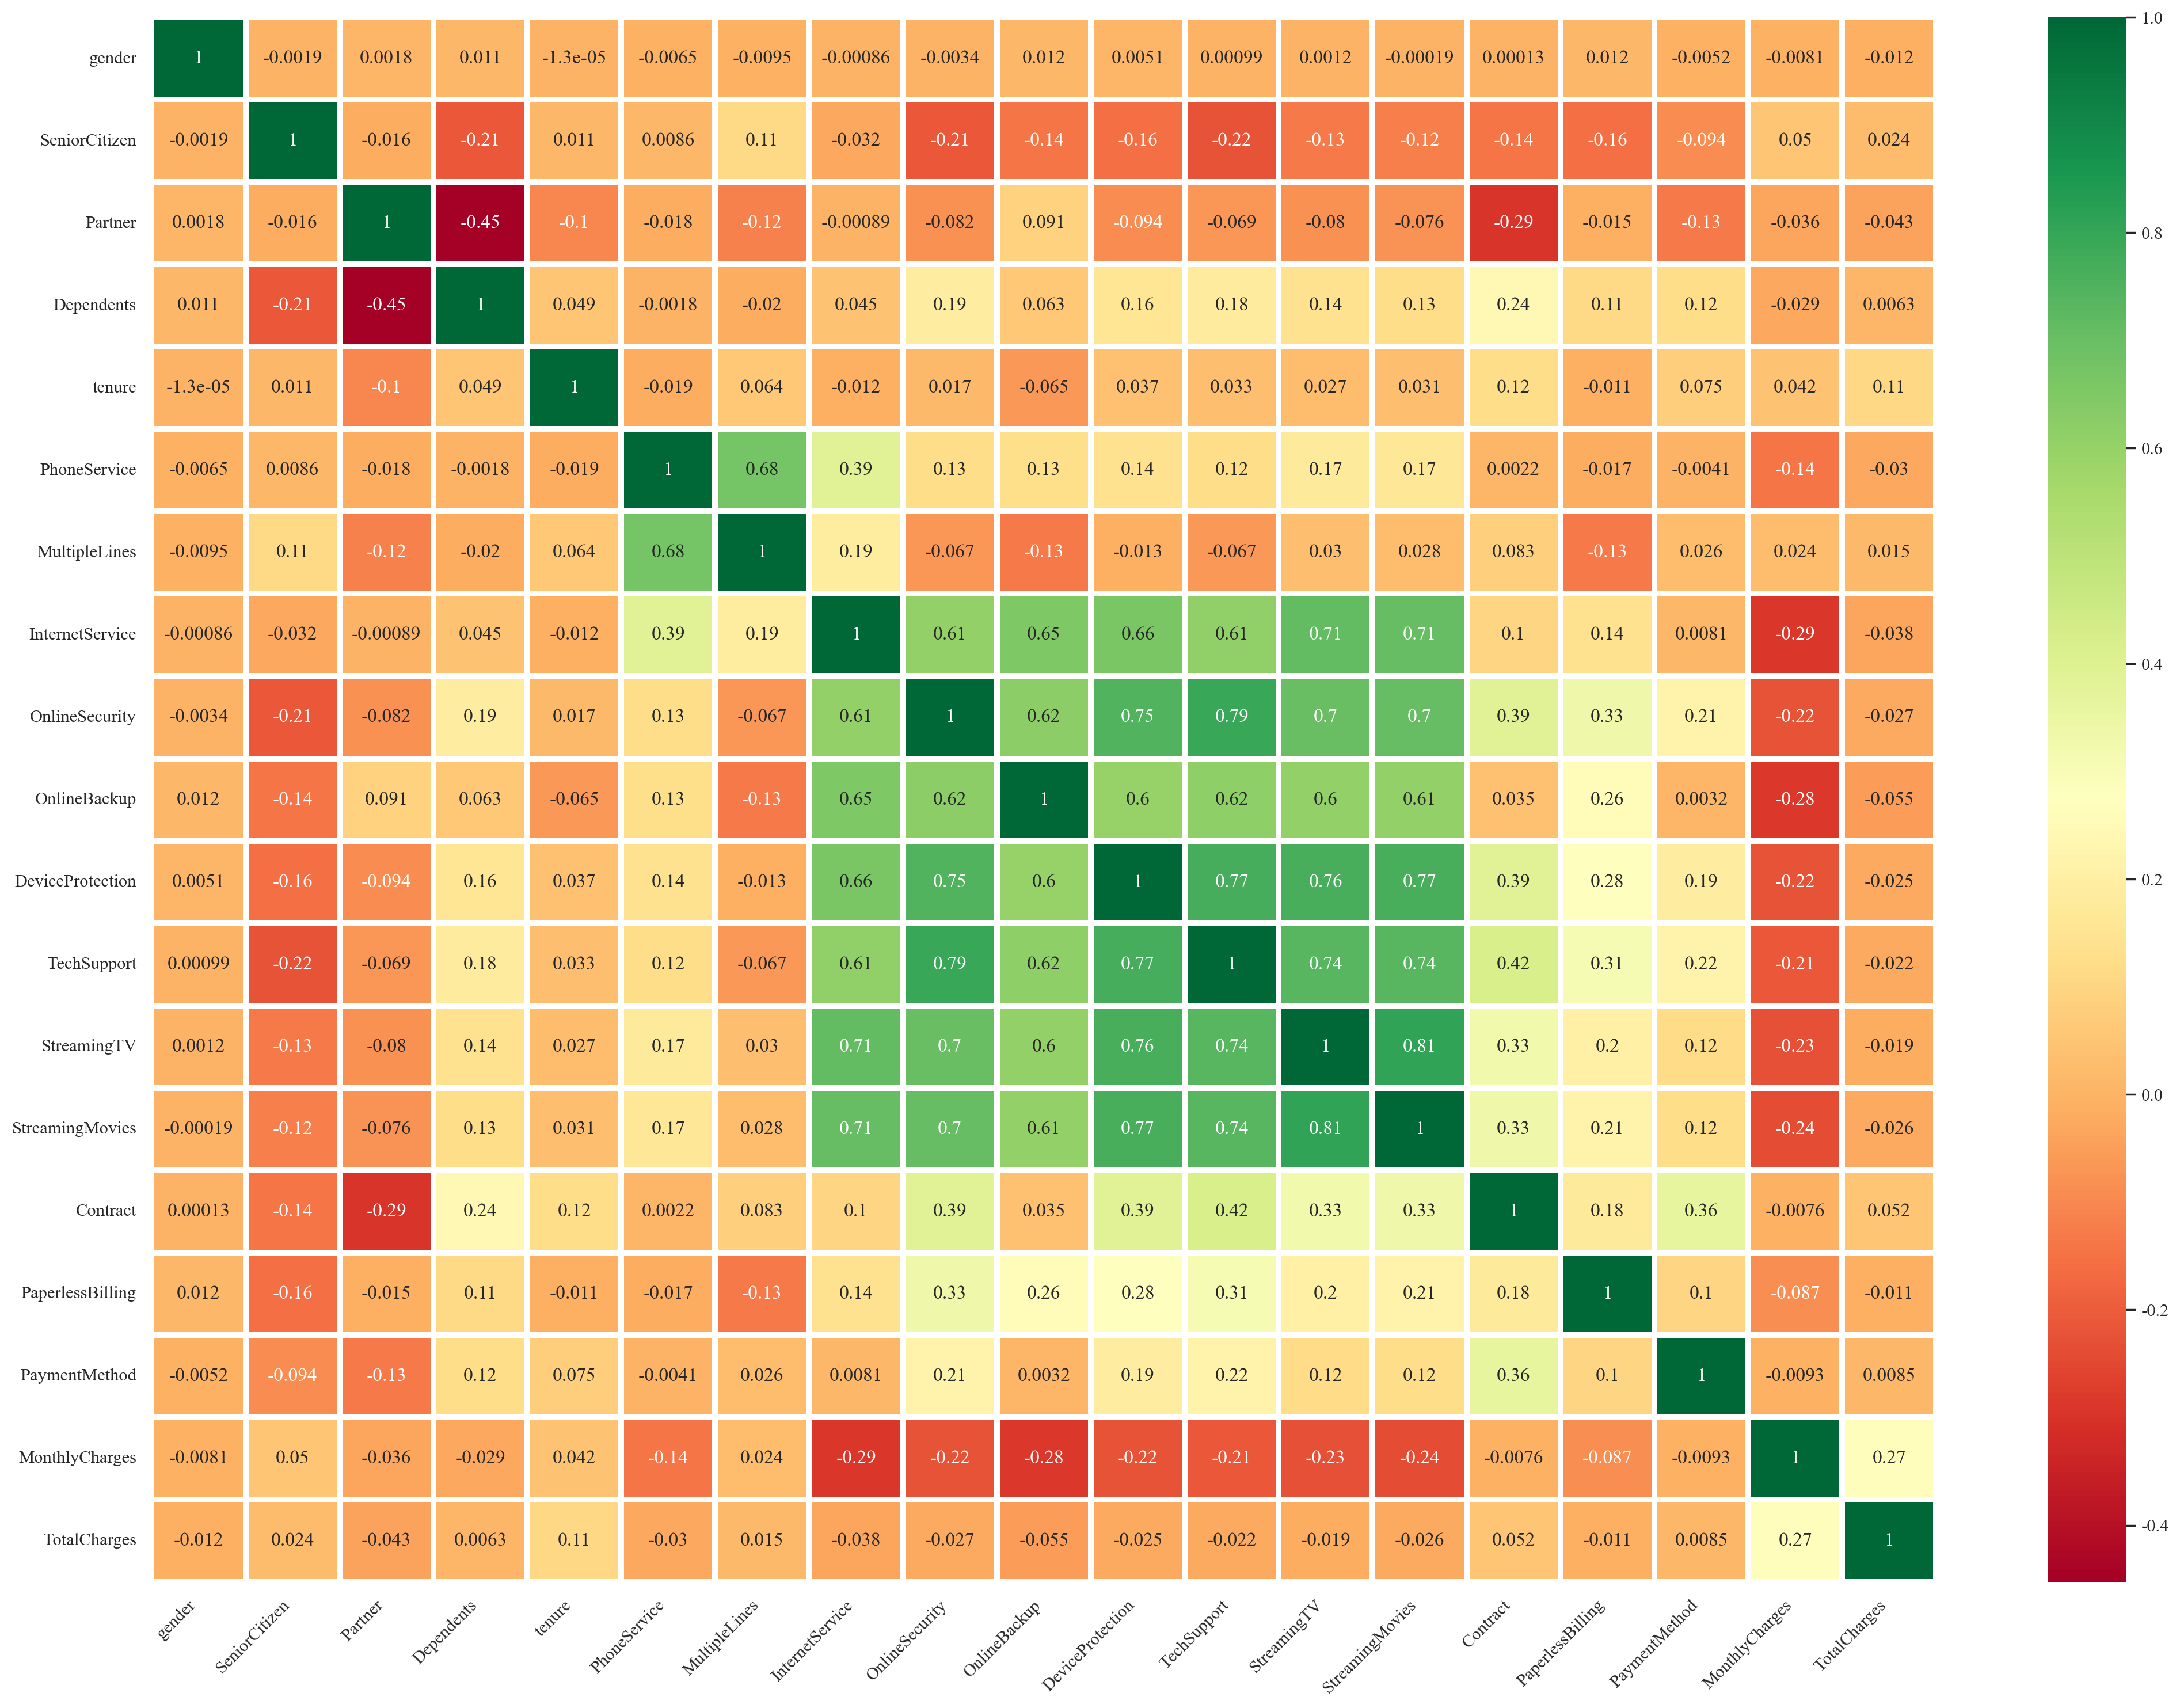

In [31]:
#你可以使用 PIL（Python Imaging Library）的 size 属性来获取图像的像素宽度和高度，并添加到标题中：
from PIL import Image

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(25,18), dpi=200)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                  linewidths=3, cmap="RdYlGn", annot=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")
#plt.title("Correlation Matrix ({} x {} pixels)".format(*ax.get_figure().get_size_inches() * ax.get_figure().dpi))
plt.show()

#在这个例子中，我们首先通过 from PIL import Image 导入 PIL 库，然后在 plt.title() 中使用 format() 函数来添加图像的像素宽度和高度。ax.get_figure().get_size_inches() 函数返回热力图的宽度和高度，以英寸为单位。我们乘以 ax.get_figure().dpi 函数返回的当前图像分辨率来获得像素宽度和高度。最后，我们使用 format() 函数将像素宽度和高度添加到标题中。

In [32]:
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10, 8), dpi=100)
# im = plt.imread("11111.png")
# h, w, _ = im.shape
# print("图片尺寸为 {} x {} 像素，分辨率为 {} dpi。".format(w, h, fig.dpi))

图片尺寸为 2533 x 2022 像素，分辨率为 100 dpi。


<Figure size 1000x800 with 0 Axes>

In [38]:
# from PIL import Image

# # Open the image file
# img = Image.open("11111.png")

# # Convert the image to RGB mode
# img = img.convert("RGB")

# # Calculate the new dimensions in pixels based on a desired
# # DPI of 200 and the current DPI of the image
# new_width = int((img.size[0] * 200) / img.info.get("dpi", (72, 72))[0])
# new_height = int((img.size[1] * 200) / img.info.get("dpi", (72, 72))[1])

# # Resize the image to the new dimensions
# img_resized = img.resize((new_width, new_height))

# # Save the resized image to a new file
# img_resized.save("image_200dpi.jpg", dpi=(200, 200))

In [3]:
# from PIL import Image

# # 加载图像
# img = plt.imread("11111.png")

# # 将图像的分辨率设置为200dpi
# img = img.resize((img.width, img.height), resample=Image.LANCZOS)
# img.info['dpi'] = (200, 200)
# # 构造保存路径
# import os
# # 保存新图像
# desktop = os.path.expanduser("~/Desktop")
# img.save(desktop + '/211111.jpg', dpi=(200, 200))
# # 保存新图像


7.2、独热编码

In [4]:
# #查看研究对象"Churn"与其他变量下的标签相关性。独热编码，可以将分类变量下的标签转化成列
# df_onehot = pd.get_dummies(df.iloc[:,1:21])
# df_onehot.head()

In [6]:
# #绘图查看 用户流失(‘Churn’)与各个维度之间的关系
# plt.figure(figsize=(15,6))
# df_onehot.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
# plt.title('Correlation between Churn  and variables ')

In [29]:
kf_var=list(df.columns[2:5])
for var in list(df.columns[7:18]):
    kf_var.append(var)
print('kf_var=',kf_var)

kf_var= ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


8、统计分析

In [30]:
#分组间确实是有显著性差异，频数比较的结论才有可信度，故需进行”卡方检验“
from scipy.stats import chi2_contingency   #统计分析 卡方检验
#自定义卡方检验函数
def KF(x):
    df1=pd.crosstab(df['Churn'],df[x])
    li1=list(df1.iloc[0,:])
    li2=list(df1.iloc[1,:])
    kf_data=np.array([li1,li2])
    kf=chi2_contingency(kf_data)
    if kf[1]<0.05:
        print('Churn by {} 的卡方临界值是{:.2f}，小于0.05，表明{}组间有显著性差异,可进行【交叉分析】'.format(x,kf[1],x),'\n')
    else:
        print('Churn by {} 的卡方临界值是{:.2f}，大于0.05，表明{}组间无显著性差异,不可进行交叉分析'.format(x,kf[1],x),'\n')
#对 kf_var进行卡方检验
print('kf_var的卡方检验结果如下:','\n')
print(list(map(KF, kf_var)))

kf_var的卡方检验结果如下: 

Churn by SeniorCitizen 的卡方临界值是0.00，小于0.05，表明SeniorCitizen组间有显著性差异,可进行【交叉分析】 

Churn by Partner 的卡方临界值是0.00，小于0.05，表明Partner组间有显著性差异,可进行【交叉分析】 

Churn by Dependents 的卡方临界值是0.00，小于0.05，表明Dependents组间有显著性差异,可进行【交叉分析】 

Churn by MultipleLines 的卡方临界值是0.00，小于0.05，表明MultipleLines组间有显著性差异,可进行【交叉分析】 

Churn by InternetService 的卡方临界值是0.00，小于0.05，表明InternetService组间有显著性差异,可进行【交叉分析】 

Churn by OnlineSecurity 的卡方临界值是0.00，小于0.05，表明OnlineSecurity组间有显著性差异,可进行【交叉分析】 

Churn by OnlineBackup 的卡方临界值是0.00，小于0.05，表明OnlineBackup组间有显著性差异,可进行【交叉分析】 

Churn by DeviceProtection 的卡方临界值是0.00，小于0.05，表明DeviceProtection组间有显著性差异,可进行【交叉分析】 

Churn by TechSupport 的卡方临界值是0.00，小于0.05，表明TechSupport组间有显著性差异,可进行【交叉分析】 

Churn by StreamingTV 的卡方临界值是0.00，小于0.05，表明StreamingTV组间有显著性差异,可进行【交叉分析】 

Churn by StreamingMovies 的卡方临界值是0.00，小于0.05，表明StreamingMovies组间有显著性差异,可进行【交叉分析】 

Churn by Contract 的卡方临界值是0.00，小于0.05，表明Contract组间有显著性差异,可进行【交叉分析】 

Churn by PaperlessBilling 的卡方临界值是0.00，小于0.05，表明PaperlessBilling组间有显

#从卡方检验的结果，kf_var包含的特征,组间都有显著性差异，可进行频数比较

8.1.2、柱形图-频数比较

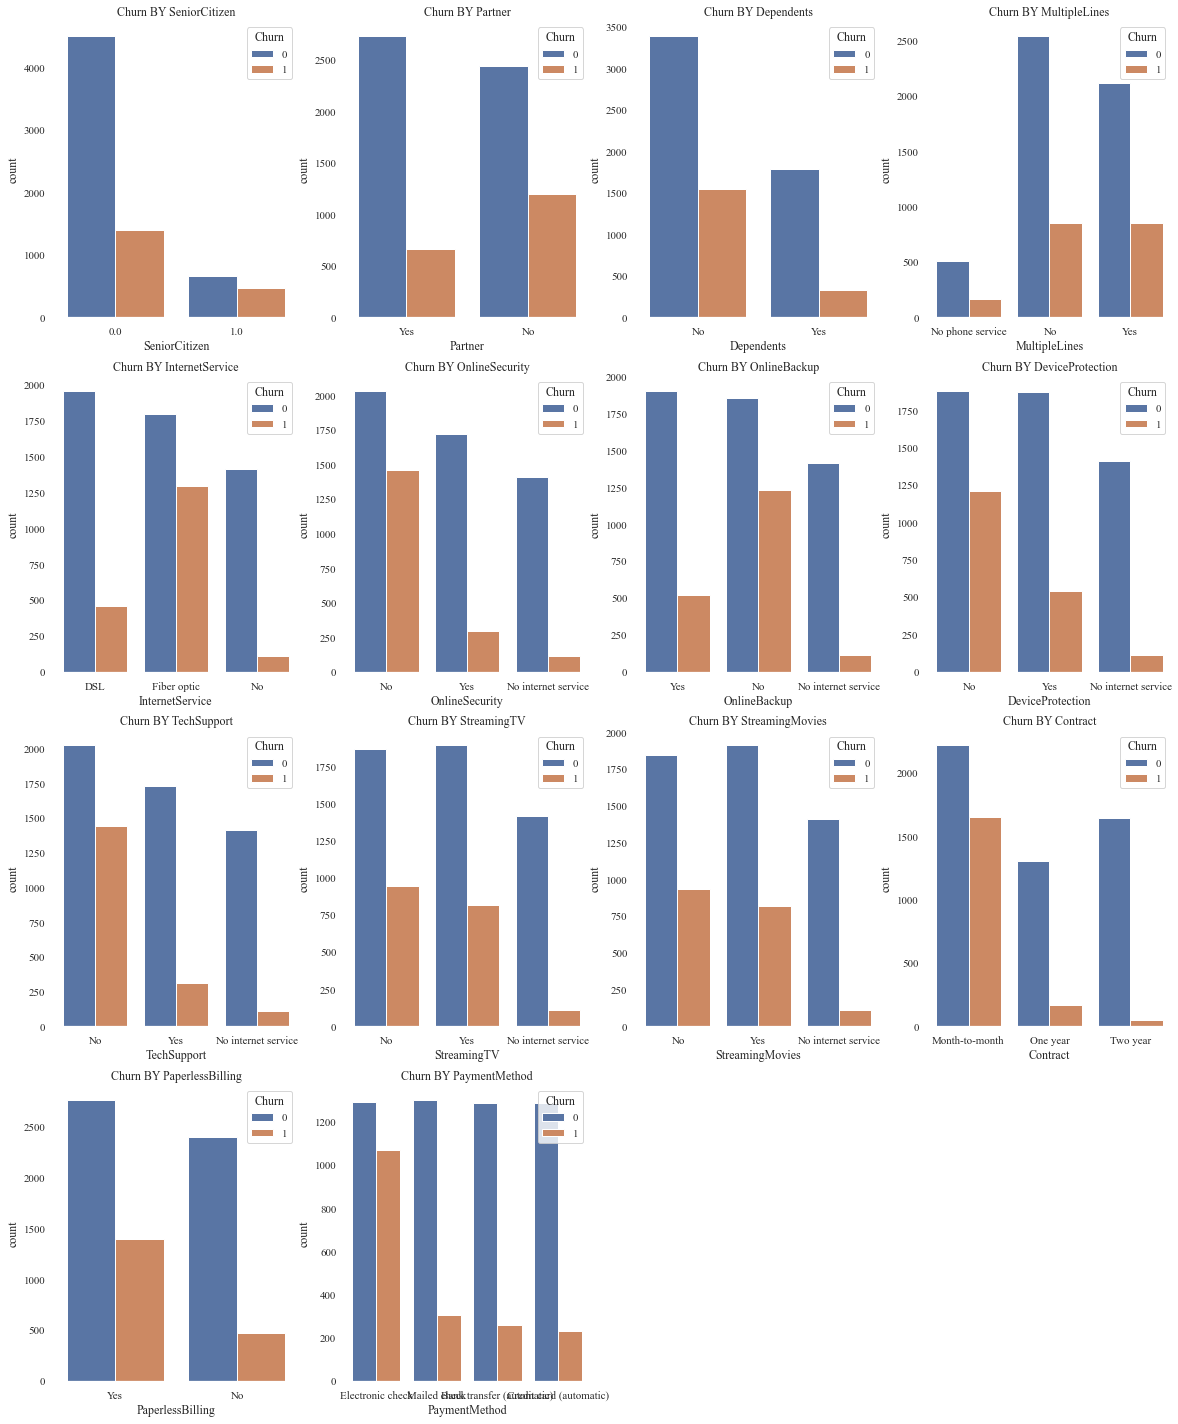

In [31]:
plt.figure(figsize=(20,25))
a=0
for k in kf_var:
    a=a+1
    plt.subplot(4,4,a)
    plt.title('Churn BY '+ k)
    sns.countplot(x=k,hue='Churn',data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

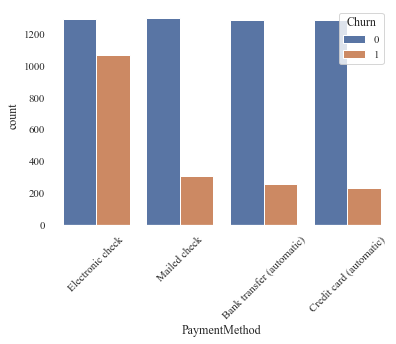

In [32]:
#因为PaymentMethod的标签比较长，影响看图，所以单独画
plt.xticks(rotation=45)
sns.countplot(x='PaymentMethod',hue='Churn',data=df)

可以直接从柱形图去判断对哪个维度对流失客户的影响大吗？不能，因为“样本不均衡”（流失客户样本占比26.5%，留存客户样本占比73.5%），基数不一样，故不能直接通过“频数”的柱形图去分析。
解决办法：交叉分析，且作同行百分比（'Churn’作为“行”）

8.1.3、交叉分析

In [33]:
print('ka_var列表中的维度与Churn交叉分析结果如下：','\n')
for i in kf_var:
    print('................Churn BY {}...............'.format(i))
    print(pd.crosstab(df['Churn'],df[i],normalize=0),'\n') #交叉分析，同行百分比

ka_var列表中的维度与Churn交叉分析结果如下： 

................Churn BY SeniorCitizen...............
SeniorCitizen       0.0       1.0
Churn                            
0              0.871279  0.128721
1              0.745318  0.254682 

................Churn BY Partner...............
Partner        No       Yes
Churn                      
0        0.471782  0.528218
1        0.642055  0.357945 

................Churn BY Dependents...............
Dependents        No       Yes
Churn                         
0           0.655199  0.344801
1           0.825575  0.174425 

................Churn BY MultipleLines...............
MultipleLines        No  No phone service       Yes
Churn                                              
0              0.491109          0.098956  0.409934
1              0.454254          0.090958  0.454789 

................Churn BY InternetService...............
InternetService       DSL  Fiber optic        No
Churn                                           
0                0.37

【SeniorCitizen 分析】：年轻用户 在流失、留存，两个标签的人数占比都高。
【Parter 分析】：单身用户更容易流失。
【Denpendents 分析】：经济不独立的用户更容易流失。
【MultipleLines 分析】：是否开通MultipleLines，对留存和流失都没有明显的促进作用。
【InternetService 分析】：办理了 “Fiber optic 光纤网络”的客户容易流失。
【OnlineSecurity 分析】：没开通“网络安全服务”的客户容易流失。
【OnlineBackup 分析】：没开通“在线备份服务”的客户容易流失。
【DeviceProtection 分析】：没开通“设备保护业务”的用户比较容易流失
【TechSupport 分析】：没开通“技术支持服务”的用户容易流失。
【StreamingTV 分析】：是否开通“网络电视”服务，对用户留存、流失，没有明显的促进作用。
【StreamingMovies 分析】：是否开通“网络电影”服务，对用户留存、流失，没有明显的促进作用
【Contract 分析】逐月签订合同的用户最容易流失。

In [ ]:
12、基于“XGB”模型输出特征重要性
笔者尝试了两个算法分别输出“特征重要性”：CatBoost算法 和 XGB 算法

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.046994
0:	learn: 0.6601942	test: 0.6604954	best: 0.6604954 (0)	total: 2.43ms	remaining: 2.42s
1:	learn: 0.6308755	test: 0.6316318	best: 0.6316318 (1)	total: 5.3ms	remaining: 2.64s
2:	learn: 0.6072604	test: 0.6084944	best: 0.6084944 (2)	total: 7.89ms	remaining: 2.62s
3:	learn: 0.5846715	test: 0.5864343	best: 0.5864343 (3)	total: 10.5ms	remaining: 2.61s
4:	learn: 0.5661407	test: 0.5684569	best: 0.5684569 (4)	total: 14.1ms	remaining: 2.8s
5:	learn: 0.5496844	test: 0.5524501	best: 0.5524501 (5)	total: 16.5ms	remaining: 2.74s
6:	learn: 0.5393878	test: 0.5426393	best: 0.5426393 (6)	total: 18.1ms	remaining: 2.57s
7:	learn: 0.5266976	test: 0.5307957	best: 0.5307957 (7)	total: 20.8ms	remaining: 2.57s
8:	learn: 0.5145325	test: 0.5189562	best: 0.5189562 (8)	total: 23ms	remaining: 2.53s
9:	learn: 0.5035816	test: 0.5084282	best: 0.5084282 (9)	total: 25.2ms	remaining: 2.5s
10:	learn: 0.4958821	test: 0.5012132	best: 0.5012132 (10)	total: 28.3ms	remaining: 2.55s
11:	learn: 0.486

136:	learn: 0.3685054	test: 0.4166993	best: 0.4163520 (121)	total: 352ms	remaining: 2.21s
137:	learn: 0.3682316	test: 0.4167004	best: 0.4163520 (121)	total: 354ms	remaining: 2.21s
138:	learn: 0.3679873	test: 0.4167025	best: 0.4163520 (121)	total: 357ms	remaining: 2.21s
139:	learn: 0.3675656	test: 0.4166349	best: 0.4163520 (121)	total: 360ms	remaining: 2.21s
140:	learn: 0.3673332	test: 0.4165875	best: 0.4163520 (121)	total: 363ms	remaining: 2.21s
141:	learn: 0.3671567	test: 0.4165829	best: 0.4163520 (121)	total: 366ms	remaining: 2.21s
142:	learn: 0.3669210	test: 0.4166363	best: 0.4163520 (121)	total: 369ms	remaining: 2.21s
143:	learn: 0.3666645	test: 0.4166098	best: 0.4163520 (121)	total: 372ms	remaining: 2.21s
144:	learn: 0.3662824	test: 0.4165057	best: 0.4163520 (121)	total: 375ms	remaining: 2.21s
145:	learn: 0.3659427	test: 0.4165737	best: 0.4163520 (121)	total: 378ms	remaining: 2.21s
146:	learn: 0.3656704	test: 0.4166498	best: 0.4163520 (121)	total: 381ms	remaining: 2.21s
147:	learn

285:	learn: 0.3283620	test: 0.4233302	best: 0.4163520 (121)	total: 706ms	remaining: 1.76s
286:	learn: 0.3280426	test: 0.4232849	best: 0.4163520 (121)	total: 708ms	remaining: 1.76s
287:	learn: 0.3278407	test: 0.4234341	best: 0.4163520 (121)	total: 710ms	remaining: 1.75s
288:	learn: 0.3276905	test: 0.4234868	best: 0.4163520 (121)	total: 712ms	remaining: 1.75s
289:	learn: 0.3275218	test: 0.4235850	best: 0.4163520 (121)	total: 714ms	remaining: 1.75s
290:	learn: 0.3272591	test: 0.4237396	best: 0.4163520 (121)	total: 716ms	remaining: 1.75s
291:	learn: 0.3271295	test: 0.4237596	best: 0.4163520 (121)	total: 719ms	remaining: 1.74s
292:	learn: 0.3269992	test: 0.4237645	best: 0.4163520 (121)	total: 722ms	remaining: 1.74s
293:	learn: 0.3268001	test: 0.4236958	best: 0.4163520 (121)	total: 724ms	remaining: 1.74s
294:	learn: 0.3265854	test: 0.4237739	best: 0.4163520 (121)	total: 726ms	remaining: 1.74s
295:	learn: 0.3263010	test: 0.4238469	best: 0.4163520 (121)	total: 729ms	remaining: 1.73s
296:	learn

410:	learn: 0.3034480	test: 0.4297159	best: 0.4163520 (121)	total: 1.06s	remaining: 1.51s
411:	learn: 0.3032209	test: 0.4297972	best: 0.4163520 (121)	total: 1.06s	remaining: 1.51s
412:	learn: 0.3030363	test: 0.4297702	best: 0.4163520 (121)	total: 1.06s	remaining: 1.51s
413:	learn: 0.3028939	test: 0.4297520	best: 0.4163520 (121)	total: 1.07s	remaining: 1.51s
414:	learn: 0.3027826	test: 0.4298514	best: 0.4163520 (121)	total: 1.07s	remaining: 1.51s
415:	learn: 0.3024445	test: 0.4300901	best: 0.4163520 (121)	total: 1.07s	remaining: 1.51s
416:	learn: 0.3021914	test: 0.4302457	best: 0.4163520 (121)	total: 1.08s	remaining: 1.5s
417:	learn: 0.3019485	test: 0.4303767	best: 0.4163520 (121)	total: 1.08s	remaining: 1.5s
418:	learn: 0.3017759	test: 0.4305074	best: 0.4163520 (121)	total: 1.08s	remaining: 1.5s
419:	learn: 0.3015814	test: 0.4307418	best: 0.4163520 (121)	total: 1.09s	remaining: 1.5s
420:	learn: 0.3012881	test: 0.4306741	best: 0.4163520 (121)	total: 1.09s	remaining: 1.5s
421:	learn: 0.3

554:	learn: 0.2788468	test: 0.4370175	best: 0.4163520 (121)	total: 1.41s	remaining: 1.13s
555:	learn: 0.2787432	test: 0.4369781	best: 0.4163520 (121)	total: 1.41s	remaining: 1.13s
556:	learn: 0.2785568	test: 0.4370831	best: 0.4163520 (121)	total: 1.42s	remaining: 1.13s
557:	learn: 0.2784674	test: 0.4371126	best: 0.4163520 (121)	total: 1.42s	remaining: 1.12s
558:	learn: 0.2782607	test: 0.4372015	best: 0.4163520 (121)	total: 1.42s	remaining: 1.12s
559:	learn: 0.2781766	test: 0.4372727	best: 0.4163520 (121)	total: 1.42s	remaining: 1.12s
560:	learn: 0.2779024	test: 0.4375038	best: 0.4163520 (121)	total: 1.42s	remaining: 1.11s
561:	learn: 0.2776446	test: 0.4375192	best: 0.4163520 (121)	total: 1.43s	remaining: 1.11s
562:	learn: 0.2775369	test: 0.4375727	best: 0.4163520 (121)	total: 1.43s	remaining: 1.11s
563:	learn: 0.2773652	test: 0.4377112	best: 0.4163520 (121)	total: 1.43s	remaining: 1.11s
564:	learn: 0.2771667	test: 0.4378253	best: 0.4163520 (121)	total: 1.43s	remaining: 1.1s
565:	learn:

712:	learn: 0.2556703	test: 0.4454419	best: 0.4163520 (121)	total: 1.76s	remaining: 711ms
713:	learn: 0.2555282	test: 0.4453996	best: 0.4163520 (121)	total: 1.77s	remaining: 708ms
714:	learn: 0.2554373	test: 0.4453702	best: 0.4163520 (121)	total: 1.77s	remaining: 705ms
715:	learn: 0.2552098	test: 0.4456581	best: 0.4163520 (121)	total: 1.77s	remaining: 703ms
716:	learn: 0.2550508	test: 0.4456803	best: 0.4163520 (121)	total: 1.77s	remaining: 700ms
717:	learn: 0.2549620	test: 0.4457810	best: 0.4163520 (121)	total: 1.78s	remaining: 698ms
718:	learn: 0.2548595	test: 0.4457548	best: 0.4163520 (121)	total: 1.78s	remaining: 695ms
719:	learn: 0.2547888	test: 0.4457694	best: 0.4163520 (121)	total: 1.78s	remaining: 693ms
720:	learn: 0.2547035	test: 0.4457786	best: 0.4163520 (121)	total: 1.78s	remaining: 690ms
721:	learn: 0.2546419	test: 0.4457663	best: 0.4163520 (121)	total: 1.79s	remaining: 688ms
722:	learn: 0.2545311	test: 0.4457928	best: 0.4163520 (121)	total: 1.79s	remaining: 685ms
723:	learn

865:	learn: 0.2375280	test: 0.4536991	best: 0.4163520 (121)	total: 2.12s	remaining: 328ms
866:	learn: 0.2374327	test: 0.4536569	best: 0.4163520 (121)	total: 2.12s	remaining: 326ms
867:	learn: 0.2372713	test: 0.4539510	best: 0.4163520 (121)	total: 2.13s	remaining: 323ms
868:	learn: 0.2372198	test: 0.4539601	best: 0.4163520 (121)	total: 2.13s	remaining: 321ms
869:	learn: 0.2370418	test: 0.4539782	best: 0.4163520 (121)	total: 2.13s	remaining: 318ms
870:	learn: 0.2369282	test: 0.4540381	best: 0.4163520 (121)	total: 2.13s	remaining: 316ms
871:	learn: 0.2368861	test: 0.4540927	best: 0.4163520 (121)	total: 2.13s	remaining: 313ms
872:	learn: 0.2367986	test: 0.4541739	best: 0.4163520 (121)	total: 2.14s	remaining: 311ms
873:	learn: 0.2366883	test: 0.4543111	best: 0.4163520 (121)	total: 2.14s	remaining: 308ms
874:	learn: 0.2366257	test: 0.4543790	best: 0.4163520 (121)	total: 2.14s	remaining: 306ms
875:	learn: 0.2364645	test: 0.4544067	best: 0.4163520 (121)	total: 2.14s	remaining: 303ms
876:	learn

<AxesSubplot:title={'center':'特征重要性'}, xlabel='feature_importance', ylabel='feature'>

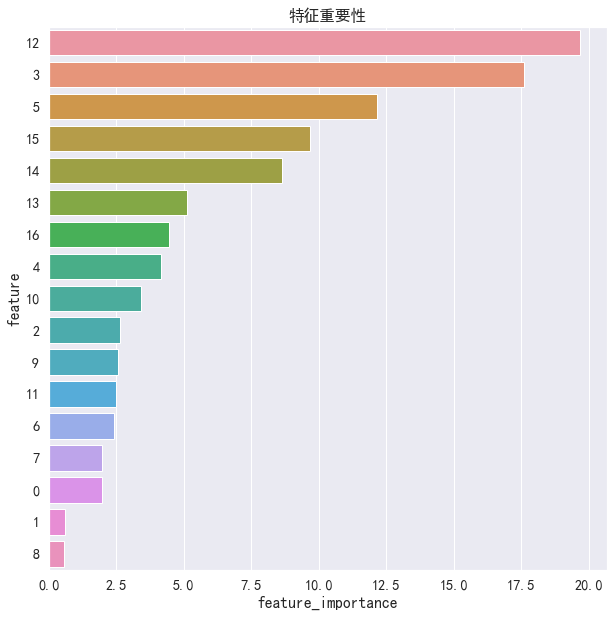

In [48]:
#CatBoost算法
model = CatBoostClassifier()
model.fit(x_train,y_train,eval_set=(x_test, y_test),plot=True)
#特征重要性可视化
catboost=pd.DataFrame(columns=['feature','feature_importance'])
catboost['feature']=model.feature_names_
catboost['feature_importance']=model.feature_importances_
catboost=catboost.sort_values('feature_importance',ascending=False) #降序排列
plt.figure(figsize=(10,10))
plt.title('特征重要性')
sns.barplot(x='feature_importance',y='feature',data=catboost)


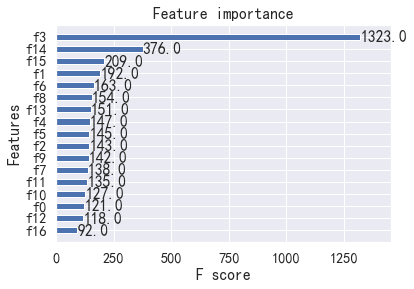

In [49]:
#XGB 算法
model_xgb= XGBClassifier()
model_xgb.fit(x_train,y_train)
from xgboost import plot_importance
plot_importance(model_xgb,height=0.5)
plt.show()


由于 XGB算法精度得分最高，故我们以XGB得到的“特征重要性”进行分析。

<AxesSubplot:xlabel='tenure', ylabel='count'>

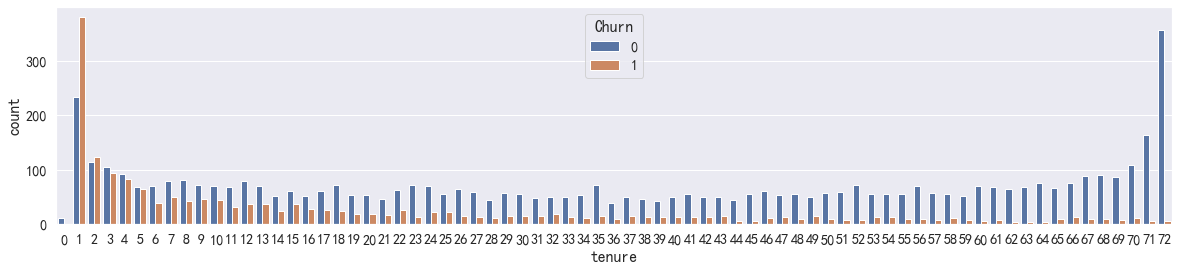

In [46]:
#第一重要特征：tenure
plt.figure(figsize=(20,4))
sns.countplot(x='tenure',hue='Churn',data=df)

由图可知，流失客户集中在1-5号职位，运营团队需要重点关注1-5号职位

第二重要特征：PaymentMethod
【分析】
使用“电子支票”支付的人更容易流失。

第三重要特征：MonthlyCharges
查看流失用户、留存用户在付费方面的偏好：
‘MonthlyCharges’、‘TotalCharges’，离散化后，可进行卡方检验，然后交叉分析。

In [52]:
#卡方检验：‘MonthlyCharges’、‘TotalCharges
df['MonthlyCharges-']=churn_var['MonthlyCharges']
df['TotalCharges-']=churn_var['TotalCharges']
print('kf_var的卡方检验结果如下:','\n')
KF('MonthlyCharges-')
KF('TotalCharges-')

kf_var的卡方检验结果如下: 

Churn by MonthlyCharges- 的卡方临界值是0.00，小于0.05，表明MonthlyCharges-组间有显著性差异,可进行【交叉分析】 

Churn by TotalCharges- 的卡方临界值是0.00，小于0.05，表明TotalCharges-组间有显著性差异,可进行【交叉分析】 



交叉分析

In [53]:
for i in ['MonthlyCharges','TotalCharges']:
    print('................Churn BY {}...............'.format(i))
    print(pd.crosstab(df['Churn'],df[i],normalize=0),'\n')

................Churn BY MonthlyCharges...............
MonthlyCharges    18.25     18.40     18.55     18.70     18.75     18.80   \
Churn                                                                        
0               0.000193  0.000193  0.000193  0.000387  0.000193  0.001353   
1               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

MonthlyCharges    18.85     18.90     18.95     19.00   ...    117.35  \
Churn                                                   ...             
0               0.000773  0.000387  0.000966  0.001160  ...  0.000193   
1               0.000535  0.000000  0.000535  0.000535  ...  0.000000   

MonthlyCharges    117.45    117.50    117.60    117.80    118.20    118.35  \
Churn                                                                        
0               0.000000  0.000193  0.000193  0.000000  0.000193  0.000000   
1               0.000535  0.000000  0.000000  0.000535  0.000000  0.000535   

MonthlyCharges    118.60  

In [50]:
# 基于"MonthlyCharges"和“TotalCharges”画四分图：
# 求两个维度的均值
print('MonthlyCharges的均值是{:.2f},TotalCharges的均值是{:.2f}'.format(df['MonthlyCharges'].mean(),df['TotalCharges'].mean()))

MonthlyCharges的均值是64.76,TotalCharges的均值是2279.73


In [71]:
#流失客户四分图：
df_1=df[df['Churn']==1] #流失客户
df_0=df[df['Churn']==0] #留存客户
plt.figure(figsize=(10,10))   
sns.scatterplot('MonthlyCharges','TotalCharges',hue='Churn', palette=plt.cm.RdYlBu,data=df_1)
plt.axhline(y=df['TotalCharges'].mean(),ls="-",c="k")
plt.axvline(x=df['MonthlyCharges'].mean(),ls="-",c="green")


SyntaxError: unexpected EOF while parsing (2727801646.py, line 5)

【分析】
四分图的右下区域，流失客户比较集中，即总费用在2281.92元以下，月费用在64.76元以上的客户比较容易流失。

In [73]:
#留存客户四分图
plt.figure(figsize=(10,10)) 
sns.scatterplot('MonthlyCharges','TotalCharges',hue='Churn', palette=plt.cm.RdYlBu_r,data=(df_0,df_1))
plt.axhline(y=df['TotalCharges'].mean(),ls="-",c="k")
plt.axvline(x=df['MonthlyCharges'].mean(),ls="-",c="green")

TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 720x720 with 0 Axes>

【结论】
综合“ 统计分析” 和 “XGB算法输出特征重要性” 得出流失客户有以下特征（依特征重要性从大到小排列）：

tenure：1-5号职位的用户比较容易流失
PaymentMethod：使用“电子支票”支付的人
MonthlyCharges 、TotalCharges:总费用在2281.92元以下，月费用在64.76元以上的客户比较容易流失
PaperlessBilling:开通电子账单
Partner:单身
OnlineBackup:没开通“在线备份业务”
InternetService：开通了 “Fiber optic 光纤网络”
TechSupport：没开通“技术支持服务”
DeviceProtection：没开通通了“设备保护业务
OnlineSecurity：没开通“网络安全服务”
Contract：“按月”签订合同方式
Dependents：无经济独立
SeniorCitizen ：青年人
TotalCharges：总费用在2281.92元以下，月费用在64.76元以上的客户比较容易流失